<h1><center><font size="5">Twitter and Reddit Sentiment Analysis</font></center></h1>
<center><img src="https://www.questionpro.com/blog/wp-content/uploads/2024/01/sentiment-analysis.jpg" width="900"></img></center>

---

# Table of Contents

<a id="toc"></a>
- [1. Set-up](#1)
    - [1.1 Import Libraries](#1.1)
    - [1.2 Import Data](#1.2)
    - [1.3 What Sentiment Analysis and why is it important?](#1.3)
    - [1.4 Dataset Attributes](#1.4)
- [2. Exploring The datasets](#2)
    - [2.1 Dataset - Quick overview](#2.1)
    - [2.2 Dataset - Data types](#2.2)
    - [2.3 Quick overview](#2.3)
- [3. Cleaning Data](#3)
    - [3.1  Dealing with Null values ](#3.1)
    - [3.2 Apply Cleaning Data ](#3.2)
    
    
- [4. Dealing with duplicated values](#4)
    
- [5. Concat reddit data and twiter data ](#5)

- [6. Data Visualization](#6)
    - [6.1 Compare Total Comments ](#6.1)
    - [6.2 Count The Negative, Neutral, and Positive Comments ](#6.2)
    - [6.3 Count the Average Length  ](#6.3)
    - [6.4 Word Clouds | Words Appear Frequently ](#6.4)
    
   
- [7. Split Test & Train Data](#7)
    - [7.1 Balance the Data | Data Must be Equivalent](#7.1)
    - [7.2 Vectorize the Comment ](#7.1)
    
    
- [8. Creating Models](#8)
    - [8.1  Linear SVC](#8.1)
    - [8.2  MultinomialNB](#8.2)
    - [8.3  Decision Tree Classifier](#8.3)


- [9. Classification Report | Linear SVC  ](#9)


- [10. Save Model](#10)

In [63]:
import os
os.chdir(r"D:\Unique_Interns\Proj2 - Sentiment analysis")

<a id="1.1"></a>
## <b>1.1 <span style='color:#2b4f92'>Import Libraries</span></b> 

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from joblib import dump

<a id="1.2"></a>
## <b>1.2 <span style='color:#2b4f92'>Import Data</span></b> 

In [65]:
reddit_data = pd.read_csv('Reddit_Data.csv')
twitter_data = pd.read_csv('Twitter_Data.csv')

<a id="1.3"></a>
## <b>1.3 <span style='color:#2b4f92'>What Sentiment Analysis and why is it important?</span></b>

Sentiment Analysis is a natural language processing (NLP) technique used to determine the emotional tone or sentiment of text. It identifies whether the expressed sentiment is positive, negative, or neutral.


  1 - Understanding Public Opinion:
    Helps brands, organizations, and individuals gauge how people feel about products, services, or topics.

  2 - Improved Decision-Making:
    Provides actionable insights for marketing, customer service, and product development by analyzing customer feedback.

  3 - Trend Detection:
    Useful for monitoring real-time sentiment on social media to detect trends, public reactions, or emerging issues.

  4 - Competitive Advantage:
    Helps businesses understand their standing compared to competitors by analyzing public sentiment toward both.

<a id="1.4"></a>
## <b>1.4 <span style='color:#2b4f92'>Dataset Attributes</span></b> 

#### Twitter Dataset


Tweet:
Contains the cleaned tweets extracted from Twitter using the Tweepy API. Textual data is preprocessed using Python libraries like re and NLP techniques to remove unwanted characters and noise.


Sentiment Label:
Indicates the sentiment associated with each tweet. The label values are as follows:

0: Neutral sentiment
1: Positive sentiment
-1: Negative sentiment



#### Reddit Dataset

Comment:
Contains the cleaned comments extracted from Reddit using the PRAW API. Similar preprocessing was applied to remove noise and ensure clean data for analysis.



Sentiment Label:
Indicates the sentiment associated with each comment. The label values are as follows:



0: Neutral sentiment
1: Positive sentiment
-1: Negative sentiment



<a id="2"></a>
## <b>2 <span style='color:#2b4f92'>Exploring dataset</span></b> 

<a id="2.1"></a>
## <b>2.1 <span style='color:#2b4f92'>dataset - Quick overview</span></b> 

In [66]:
reddit_data.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [67]:
twitter_data.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


<a id="2.2"></a>
## <b>2.2 <span style='color:#2b4f92'>dataset - Data types</span></b> 

In [68]:
reddit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [69]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


<a id="2.3"></a>
## <b>2.3 <span style='color:#2b4f92'> Quick overview</span></b> 

### Reddit Data

#### Missing Values:

- clean_comment: Contains 37,149 non-null values out of 37,249 entries (100 missing values). Minimal handling required.
- category: Complete data with no missing values.



### Twitter Data

#### Missing Values:

- clean_text: Contains 162,976 non-null values out of 162,980 entries (4 missing values).
- category: Contains 162,973 non-null values out of 162,980 entries (7 missing values). Missing values need to be addressed.

<a href="#toc" role="button" aria-pressed="true" >🔝Back to Table of Contents🔝</a>

<a id="3"></a>
## <b>3 <span style='color:#2b4f92'> Cleaning Data </span></b> 

In [70]:
def cleanText(string):
    punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    cleanedText = ' '.join(''.join([i for i in string if not i.isdigit()]).split())
    
    for i in punc:
        cleanedText = cleanedText.replace(i, '')
        
    a = [i for i in cleanedText if i.isalpha() or i == ' ']
            
    final_text = ' '.join(''.join(a).split())
    return final_text 

<a id="3.1"></a>
## <b>3.1 <span style='color:#2b4f92'> Dealing with Null values </span></b> 

In [71]:
print(reddit_data.isna().sum())
print('-' * 20)
print(twitter_data.isna().sum())

clean_comment    100
category           0
dtype: int64
--------------------
clean_text    4
category      7
dtype: int64


In [72]:
reddit_data = reddit_data.dropna(how='any')
twitter_data = twitter_data.dropna(how='any')

In [73]:
print(reddit_data.isna().sum())
print('-' * 20)
print(twitter_data.isna().sum())

clean_comment    0
category         0
dtype: int64
--------------------
clean_text    0
category      0
dtype: int64


<a id="3.2"></a>
## <b>3.2 <span style='color:#2b4f92'> Apply Cleaning Data  </span></b> 

In [74]:
reddit_data.rename(columns={'clean_comment':'comment'}, inplace=True)
twitter_data.rename(columns={'clean_text':'comment'}, inplace=True)

reddit_data.category = reddit_data.category.apply(lambda x: int(x))
twitter_data.category = twitter_data.category.apply(lambda x: int(x))

reddit_data.comment = reddit_data.comment.apply(cleanText)
twitter_data.comment = twitter_data.comment.apply(cleanText)

<a id="4"></a>
## <b>4 <span style='color:#2b4f92'> Dealing with duplicated values </span></b> 

In [75]:
reddit_data.duplicated().sum()

619

In [76]:
twitter_data.duplicated().sum()

3507

In [77]:
reddit_data.drop_duplicates(subset='comment', keep=False, inplace=True)
twitter_data.drop_duplicates(subset='comment', keep=False, inplace=True)

In [78]:
reddit_data.duplicated().sum()

0

In [79]:
twitter_data.duplicated().sum()

0

<a id="5"></a>
## <b>5 <span style='color:#2b4f92'> Concat reddit data and twiter data </span></b> 

In [80]:
concat_df = pd.concat([reddit_data, twitter_data], ignore_index=True)
concat_df.drop_duplicates(subset='comment', keep=False, inplace=True)

<a href="#toc" role="button" aria-pressed="true" >🔝Back to Table of Contents🔝</a>

<a id="6"></a>
## <b>6 <span style='color:#2b4f92'> Data Visualization </span></b> 

<a id="6.1"></a>
## <b>6.1 <span style='color:#2b4f92'> Compare Total Comments </span></b> 

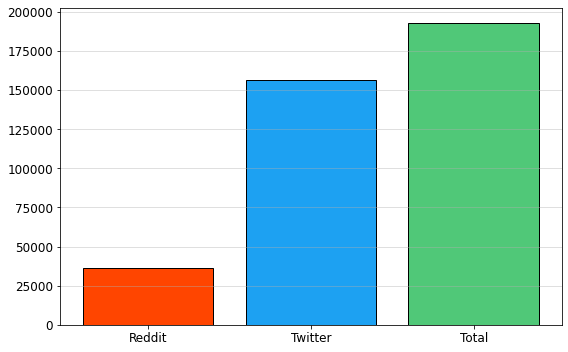

In [81]:
counts = [len(reddit_data), len(twitter_data), len(concat_df)]
labels = ['Reddit', 'Twitter', 'Total']
colors = ['#ff4500', '#1DA1F2', '#50C878']

plt.figure(figsize=(8,5))

plt.bar(labels, counts, color=colors, edgecolor='black')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis='y', alpha=0.5)
plt.tight_layout()

<a id="6.2"></a>
## <b>6.2 <span style='color:#2b4f92'> Count The Negative, Neutral, and Positive Comments </span></b> 

In [82]:
negative_count = [len(reddit_data[reddit_data.category == -1]),
                 len(twitter_data[twitter_data.category == -1]),
                 len(concat_df[concat_df.category == -1])]

neutral_count = [len(reddit_data[reddit_data.category == 0]),
                 len(twitter_data[twitter_data.category == 0]),
                 len(concat_df[concat_df.category == 0])]

positive_count = [len(reddit_data[reddit_data.category == 1]),
                 len(twitter_data[twitter_data.category == 1]),
                 len(concat_df[concat_df.category == 1])]

x = ['Reddit', 'Twitter', 'Total']
x_indexes = np.arange(len(x))
width = 0.25

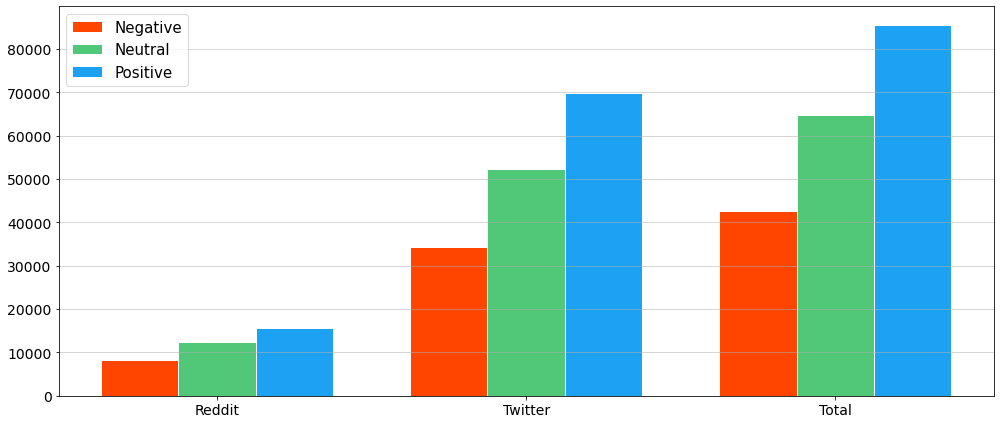

In [83]:
plt.figure(figsize=(14,6))

plt.bar(x_indexes - width, negative_count, width=width, label='Negative', edgecolor='white', color='#ff4500')
plt.bar(x_indexes, neutral_count, width=width, label='Neutral', edgecolor='white', color='#50C878')
plt.bar(x_indexes + width, positive_count, width=width, label='Positive', edgecolor='white', color='#1DA1F2')

plt.yticks(fontsize=14)
plt.xticks(ticks=x_indexes, labels=x, fontsize=14)

plt.legend(prop={'size':15})
plt.grid(axis='y', alpha=0.65)
plt.tight_layout()

<a id="6.3"></a>
## <b>6.3 <span style='color:#2b4f92'> Count the Average Length </span></b> 

In [84]:
negative_avg = int(sum([len(i) for i in concat_df[concat_df.category == -1].comment]) / len(concat_df[concat_df.category == 1]))
neutral_avg = int(sum([len(i) for i in concat_df[concat_df.category == 0].comment]) / len(concat_df[concat_df.category == 0]))
positive_avg = int(sum([len(i) for i in concat_df[concat_df.category == 1].comment]) / len(concat_df[concat_df.category == 1]))

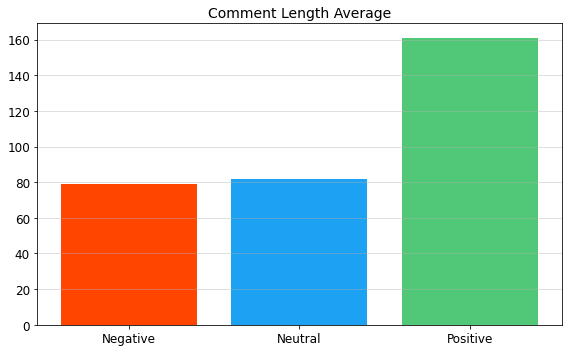

In [85]:
plt.figure(figsize=(8,5))

plt.bar(['Negative', 'Neutral', 'Positive'], [negative_avg, neutral_avg, positive_avg], color=colors)

plt.title('Comment Length Average', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis='y', alpha=0.5)
plt.tight_layout()

<a id="6.4"></a>
## <b>6.4 <span style='color:#2b4f92'> Word Clouds | Words Appear Frequently </span></b> 

In [86]:
negative_words = ''
neutral_words = ''
positive_words = ''

stopwords = set(STOPWORDS)

for comment, category in zip(concat_df.comment, concat_df.category):
    tokens = comment.split()
    
    for word in tokens:
        if category == -1:
            negative_words += word + ' '
        elif category == 0:
            neutral_words += word + ' '
        else:
            positive_words += word + ' '

In [87]:
negative_cloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(negative_words)

neutral_cloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(neutral_words)

positive_cloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(positive_words)

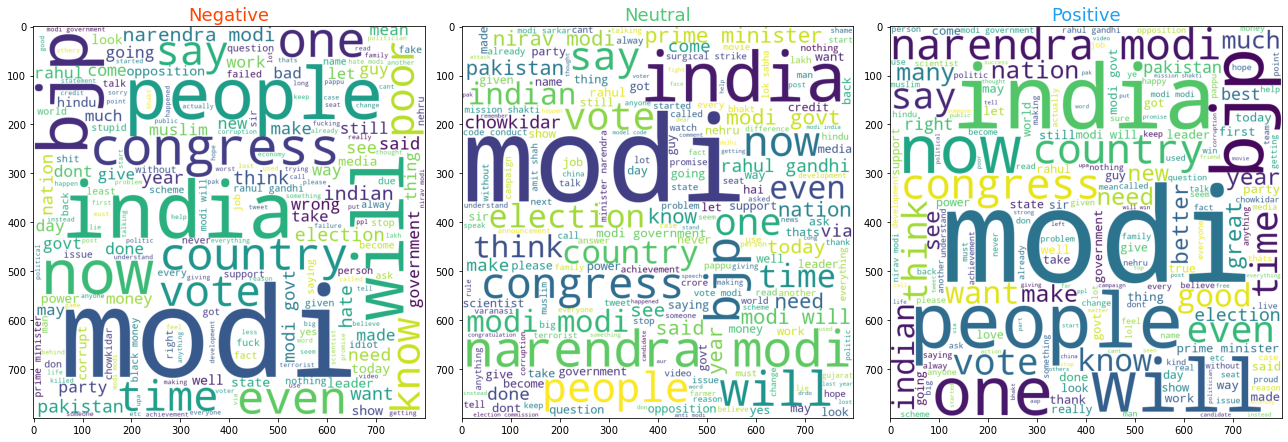

In [88]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18, 8), facecolor=None)

ax1.imshow(negative_cloud)
ax1.set_title('Negative', fontsize=18, color='#ff4500')


ax2.imshow(neutral_cloud)
ax2.set_title('Neutral', fontsize=18, color='#50C878')

ax3.imshow(positive_cloud)
ax3.set_title('Positive', fontsize=18, color='#1DA1F2')

plt.tight_layout()

<a id="7"></a>
## <b>7 <span style='color:#2b4f92'> Split Test & Train Data </span></b> 

<a id="7.1"></a>
## <b>7.1 <span style='color:#2b4f92'> Balance the Data | Data Must be Equivalent </span></b> 

In [89]:
class Data:
    def __init__(self, df):
        self.df = df
        
    def fixData(self):
        dataframe = self.df
        lowest_len = min([i for i in dataframe.category.value_counts()])
        
        # Create the final data frame
        final_df = pd.concat([dataframe[dataframe.category == -1][:lowest_len],
                             dataframe[dataframe.category == 0][:lowest_len],
                             dataframe[dataframe.category == 1][:lowest_len]])
        
        # To shuffle the rows in the data frame
        final_df = final_df.sample(frac=1).reset_index(drop=True)
        return final_df

In [90]:
a = Data(concat_df)
fixed_df = a.fixData()
print(f'Before: \n{concat_df.category.value_counts()}\n')
print(f'After: \n{fixed_df.category.value_counts()}')

Before: 
 1    85581
 0    64771
-1    42628
Name: category, dtype: int64

After: 
 0    42628
-1    42628
 1    42628
Name: category, dtype: int64


In [91]:
train_X, test_X, train_y, test_y = train_test_split([i for i in fixed_df.comment], [i for i in fixed_df.category], test_size=0.25, random_state=1)

<a id="7.2"></a>
## <b>7.2 <span style='color:#2b4f92'> Vectorize the Comment </span></b> 

In [92]:
vectorizer = TfidfVectorizer()
train_X_vectors = vectorizer.fit_transform(train_X)
test_X_vectors = vectorizer.transform(test_X)

In [93]:
dump(vectorizer, 'tfidf_vectorizer.joblib')

['tfidf_vectorizer.joblib']

<a id="8"></a>
## <b>8 <span style='color:#2b4f92'> Creating Models </span></b> 

<a id="8.1"></a>
## <b>8.1 <span style='color:#2b4f92'> Linear SVC </span></b> 

In [94]:
clf_svm = LinearSVC()
clf_svm.fit(train_X_vectors, train_y)
clf_prediction = clf_svm.predict(test_X_vectors)

print(f'Accuracy: {clf_svm.score(test_X_vectors, test_y)}')
print(f'Accuracy: {f1_score(test_y, clf_prediction, average=None, labels=[-1, 0, 1])}')

Accuracy: 0.9342216383597636
Accuracy: [0.91949396 0.96098319 0.92107996]


<a id="8.2"></a>
## <b>8.2 <span style='color:#2b4f92'> MultinomialNB </span></b> 

In [95]:
svm_mnb = MultinomialNB()
svm_mnb.fit(train_X_vectors, train_y)
mnb_prediction = svm_mnb.predict(test_X_vectors)

print(f'Accuracy: {svm_mnb.score(test_X_vectors, test_y)}')
print(f'Accuracy: {f1_score(test_y, mnb_prediction, average=None, labels=[-1, 0, 1])}')

Accuracy: 0.6873729317193706
Accuracy: [0.71125283 0.590712   0.7280781 ]


<a id="8.3"></a>
## <b>8.3 <span style='color:#2b4f92'> Decision Tree Classifier </span></b> 

In [96]:
svm_dtc = DecisionTreeClassifier()
svm_dtc.fit(train_X_vectors, train_y)
dtc_prediction = svm_dtc.predict(test_X_vectors)

print(f'Accuracy: {svm_dtc.score(test_X_vectors, test_y)}')
print(f'Accuracy: {f1_score(test_y, dtc_prediction, average=None, labels=[-1, 0, 1])}')

Accuracy: 0.7634418691939571
Accuracy: [0.71084161 0.82997144 0.74375148]


#### After experimenting with several machine learning models for sentiment analysis, LinearSVC emerged as the best-performing model.

- Model Accuracy: LinearSVC achieved an impressive accuracy of 93% on the test dataset, outperforming other models in terms of prediction reliability.

<a id="9"></a>
## <b>9 <span style='color:#2b4f92'> Classification Report | Linear SVC  </span></b> 

In [97]:
print("Classification Report:")
print(classification_report(test_y, clf_prediction, labels=[-1, 0, 1]))

Classification Report:
              precision    recall  f1-score   support

          -1       0.93      0.91      0.92     10529
           0       0.94      0.98      0.96     10744
           1       0.93      0.91      0.92     10698

    accuracy                           0.93     31971
   macro avg       0.93      0.93      0.93     31971
weighted avg       0.93      0.93      0.93     31971



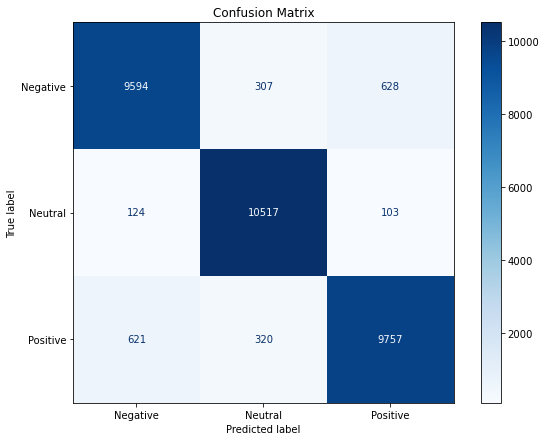

In [98]:
conf_matrix = confusion_matrix(test_y, clf_prediction, labels=[-1, 0, 1])

plt.figure(figsize=(10, 7))  

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Negative', 'Neutral', 'Positive'])
disp.plot(cmap='Blues', ax=plt.gca())  
plt.title("Confusion Matrix")
plt.show()

<a id="10"></a>
## <b>10 <span style='color:#2b4f92'> Save Model  </span></b> 

In [99]:
dump(clf_svm, 'Sentiment Analysis.joblib')

['Sentiment Analysis.joblib']